In [1]:
### modelos a probar
#probar frequency encoding
#random forest
#catboost
#xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as os
import scipy.stats as stats
import numpy as np



In [3]:
df = pd.read_csv(r'C:\Users\agustin\Desktop\ITBA\ANALITICA PREDICTIVA\origen.csv', delimiter=',', engine= 'python')

In [4]:
df

,Id,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,...,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,video
0,0,6.0,7,tvSeries,0.0,2019,0,0,News,"nm1635586,nm1230149,nm2085337",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.9,42,tvEpisode,0.0,2011,0,46,"Comedy,Crime,Drama",nm3398609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7.8,8,tvEpisode,0.0,2016,0,45,"Documentary,History",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.2,115,tvEpisode,0.0,1992,0,30,"Comedy,Drama",nm0067621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.8,74,movie,0.0,1961,0,103,Western,nm0060430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977536,977536,6.8,118,movie,0.0,2016,0,87,Documentary,nm0068385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977537,977537,7.3,91,movie,0.0,1994,0,115,Documentary,"nm0007366,nm0062743",...,Brother Minister reveals the mystery surroundi...,0.036800,[],[],1995-03-01,0.0,115.0,Released,NaN,False
977538,977538,8.3,9491,movie,0.0,1995,0,145,"Action,Crime,Drama",nm0471452,...,Auto rickshaw driver Manickam avoids violence ...,0.704162,"[{'name': 'Sathya Movies', 'id': 16434}]","[{'iso_3166_1': 'IN', 'name': 'India'}]",1995-01-15,15000000.0,145.0,Released,NaN,False
977539,977539,7.0,811,short,0.0,1943,0,8,"Animation,Comedy,Family",nm0293989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

Id                        int64
averageRating           float64
numVotes                  int64
titleType                object
isAdult                 float64
startYear                 int64
endYear                   int64
runtimeMinutes            int64
genres_x                 object
directors                object
writers                  object
seasonNumber            float64
episodeNumber           float64
ordering                float64
language                 object
attributes               object
isOriginalTitle         float64
adult                    object
budget                  float64
genres_y                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
video                    object
dtype: o

In [67]:
#ver esto de aca abajo bien y ver q tengo q limpiar

In [6]:
df.dtypes
len(df.dtypes)
c=0
for i in range(len(df.dtypes)):
  if df.dtypes.iloc[i] == 'int64':
    print(df.columns[i])
    if  df[df.columns[i]].isnull().values.any() == True:
      print("en la variables hay ", df[df.columns[i]].isnull().sum(), "valores nulos")
      print("valor minimos ",df[df.columns[i]].min())
      print("valor maximos ", df[df.columns[i]].max())
      print("En la variable el primer cuartil es ",np.percentile(df[df.columns[i]], 25),", el tercer cuartil es ",np.percentile(df[df.columns[i]], 75)," y la mediana es ", np.median(df[df.columns[i]]))
      print()
      print()

    else:
      print("No hay valores nulos")  
      print("valor minimos ",df[df.columns[i]].min())
      print("valor maximos ", df[df.columns[i]].max())
      print("En la variable el primer cuartil es ",np.percentile(df[df.columns[i]], 25),", el tercer cuartil es ",np.percentile(df[df.columns[i]], 75)," y la mediana es ", np.median(df[df.columns[i]]))
      print()
      print()

  elif df.dtypes.iloc[i] == 'float64':
    print(df.columns[i])
    if  df[df.columns[i]].isnull().values.any() == True:
      print("en la variables hay ", df[df.columns[i]].isnull().sum(), "valores nulos")
      print("valor minimos ",df[df.columns[i]].min())
      print("valor maximos ", df[df.columns[i]].max())
      print("En la variable el primer cuartil es ",np.percentile(df[df.columns[i]], 25),", el tercer cuartil es ",np.percentile(df[df.columns[i]], 75)," y la mediana es ", np.median(df[df.columns[i]]))
      print()
      print()

    else:
      print("No hay valores nulos")  
      print("valor minimos ",df[df.columns[i]].min())
      print("valor maximos ", df[df.columns[i]].max())
      print("En la variable el primer cuartil es ",np.percentile(df[df.columns[i]], 25),", el tercer cuartil es ",np.percentile(df[df.columns[i]], 75)," y la mediana es ", np.median(df[df.columns[i]]))
      print()
      print()
  else:
    if  df[df.columns[i]].isnull().values.any() == True:
      print("en la variables hay ", df[df.columns[i]].isnull().sum(), "valores nulos")      
      x = df[df.columns[i]].unique()
      if len(x)<30:
        for i in range(len(x)):
          print(x[i]) 
      else:
        print('muchos registros en la varibale ', df.columns[i], 'analizar detalladamente si vale la pena sumarlo la modelo')
    else:
      print("No hay valores nulos")
      x = df[df.columns[i]].unique()
      if len(x)<30:
        for i in range(len(x)):
          print(x[i]) 
      else:
        print('muchos registros en la varibale ', df.columns[i], 'analizar detalladamente si vale la pena sumarlo la modelo')
    print()
    print()


Id
No hay valores nulos
valor minimos  0
valor maximos  977540
En la variable el primer cuartil es  244385.0 , el tercer cuartil es  733155.0  y la mediana es  488770.0


averageRating
No hay valores nulos
valor minimos  1.0
valor maximos  10.0
En la variable el primer cuartil es  6.1 , el tercer cuartil es  7.9  y la mediana es  7.1


numVotes
No hay valores nulos
valor minimos  5
valor maximos  2425542
En la variable el primer cuartil es  9.0 , el tercer cuartil es  92.0  y la mediana es  22.0


No hay valores nulos
tvSeries
tvEpisode
movie
video
tvMiniSeries
short
tvSpecial
tvMovie
videoGame
tvShort


isAdult
No hay valores nulos
valor minimos  0.0
valor maximos  2020.0
En la variable el primer cuartil es  0.0 , el tercer cuartil es  0.0  y la mediana es  0.0


startYear
No hay valores nulos
valor minimos  0
valor maximos  2021
En la variable el primer cuartil es  1992.0 , el tercer cuartil es  2015.0  y la mediana es  2008.0


endYear
No hay valores nulos
valor minimos  0
valor max

In [7]:
#Adecuacion de varibales para un primer modelo, se busca que no tengan mucho valores faltantes

In [8]:
df[['genero1','genero2_']] = df.genres_x.apply(lambda x: pd.Series(str(x).split(",", 1))) 


In [9]:
df[['genero2','genero3']] = df.genero2_.apply(lambda x: pd.Series(str(x).split(",", 1))) 


In [10]:
df.release_date
df[['releaseYear', 'releaseSprecific  ']] = df.release_date.apply(lambda x: pd.Series(str(x).split("-", 1))) 

In [11]:
df.status.unique()
#encoder propio
df.loc[df['status'] == "nan", 'status'] = '0'
df.loc[df['status'] == "Released", 'status'] = '1'
df.loc[df['status'] == "Planned", 'status'] = '2'
df.loc[df['status'] == "Rumored", 'status'] = '3'
df.loc[df['status'] == "Post Production", 'status'] = '4'
df.loc[df['status'] == "In Production", 'status'] = '5'


In [12]:
#encoder de la variable adult
df.loc[df['adult'] == "nan", 'adult'] = '0'
df.loc[df['adult'] == "False", 'status'] = '0'
df.loc[df['status'] == "True", 'status'] = '1'

In [13]:
df.budget.isna().sum()/ len(df.budget) #demasiado valores, flatantes no se usa en la base, a priori no da demasiada informacion

0.9516081678415534

In [14]:
df.revenue.isna().sum()/ len(df.revenue) #demasiado valores, flatantes no se usa en la base, a priori no da demasiada informacion

0.9516112367665397

In [15]:
df.tagline.unique() # no creo que en una primera instancia ayude mucho al modelo


array([nan, 'Watch out for THE PROWLER', 'Every dog has his day.', ...,
       'A rebellious young man. With his own version of the future. And his own fantasy of love.',
       'A youthful, impulsive sexual encounter opens the door to a dark comedy about the complexities of honesty.',
       'His Great New 1941 Thrill Drama!'], dtype=object)

In [16]:
df[['director_principal','restodirectores']] = df.directors.apply(lambda x: pd.Series(str(x).split(",", 1))) 

In [17]:
df.groupby('director_principal', sort=True)['director_principal'].agg(['count'])

,count
director_principal,
0,147406
nm0000005,71
nm0000008,2
nm0000009,1
nm0000010,1
...,...
nm9992763,1
nm9992852,1
nm9992905,1


In [18]:
df[['escritor_principal','restoescritores']] = df.writers.apply(lambda x: pd.Series(str(x).split(",", 1))) 

In [19]:
df.groupby('escritor_principal', sort=True)['escritor_principal'].agg(['count'])

,count
escritor_principal,
0,224376
nm0000005,66
nm0000018,2
nm0000019,25
nm0000024,1
...,...
nm9992556,1
nm9993124,1
nm9993145,2


In [20]:
df[['averageRating','directors', 'director_principal', 'writers', 'escritor_principal']]

,averageRating,directors,director_principal,writers,escritor_principal
0,6.0,"nm1635586,nm1230149,nm2085337",nm1635586,0,0
1,6.9,nm3398609,nm3398609,nm0449959,nm0449959
2,7.8,0,0,0,0
3,8.2,nm0067621,nm0067621,nm0719927,nm0719927
4,5.8,nm0060430,nm0060430,"nm0038160,nm0256467,nm0543733,nm0060430",nm0038160
...,...,...,...,...,...
977536,6.8,nm0068385,nm0068385,0,0
977537,7.3,"nm0007366,nm0062743",nm0007366,"nm0007366,nm0062743,nm0149331",nm0007366
977538,8.3,nm0471452,nm0471452,"nm0049400,nm0471452,nm2701239",nm0049400
977539,7.0,nm0293989,nm0293989,"nm0288111,nm0540789,nm0588514,nm0682481",nm0288111


In [21]:
#vale la pena agregarlo como datos, habiendo en ambos casos una gran parte de datos faltantes

In [22]:
df.ordering.isna().sum()/len(df.ordering) #62% de valores faltantes, creo que ene un primer modelo no asportaria demasiada informacion, se puede scar en uyna primera instancia y edspues usarlo para optimizar

0.6206379067476454

In [23]:
df.language.unique()

array(['0', nan, 'en', 'es', 'yi', 'haw', 'fr', 'myv'], dtype=object)

In [24]:

#transformacion de nan a 0 y resto de idiomas a categoricas
df.loc[df['language'] == "nan", 'language'] = '0'
df.loc[df['language'] == "en", 'language'] = '1'
df.loc[df['language'] == "es", 'language'] = '2'
df.loc[df['language'] == "yi", 'language'] = '3'
df.loc[df['language'] == "haw", 'language'] = '4'
df.loc[df['language'] == "fr", 'language'] = '5'
df.loc[df['language'] == "myv", 'language'] = '6'


In [25]:
df.isOriginalTitle

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
977536    0.0
977537    0.0
977538    0.0
977539    0.0
977540    0.0
Name: isOriginalTitle, Length: 977541, dtype: float64

In [26]:
df.isOriginalTitle.max()

1.0

In [27]:
df.loc[df['isOriginalTitle'] == "nan", 'isOriginalTitle'] = 0 # si es un valor faltante se supone que no es un original title


In [28]:
df.original_language.unique() #hacer un auto encoder porque alta paja hacer yo uno por uno

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.original_language)
le.classes_
j = le.transform(df.original_language)
df['idioma_original'] = j

In [29]:
df.idioma_original

0         87
1         87
2         87
3         87
4         87
          ..
977536    87
977537    17
977538    74
977539    87
977540    87
Name: idioma_original, Length: 977541, dtype: int32

In [30]:
df.popularity.isna().sum()/len(df.popularity) #95% de valores nullos

0.9516112367665397

In [31]:
df.production_companies.isna().sum()/len(df.popularity) #95% de valores nullos

0.9516112367665397

In [32]:
df.production_countries.isna().sum()/len(df.popularity) #95% de valores nullos, a priori para un primer modelo no mme deberia servir

0.9516112367665397

In [33]:
df.video.isna().sum()/977541 #muchos valores nulos para un primer modelo

0.9516112367665397

In [34]:
df.runtime.isna().sum()/len(df.runtime) #en un primer modelo hay mucho valores nulos

0.9518219696155967

In [35]:
#DF filtrado

In [87]:
filtrado = df[['Id',
'averageRating', #listo para usar
'numVotes', #listo para usar
'startYear', #listo para usar
'runtimeMinutes', #listo para usar
'director_principal', #despues para optimizar un poco mas el modelo se le pueden agregar mas dierectores, se podrian hacer un encoding con los directores mas repetidos
'escritor_principal', #despeues para optmizar el modelo se podrian usar mas escritores y parsiar la otra columna, el encoding se haria con los escritores mas repetidos
'genero1', #listo para usar, luego se le pueden agregar mas generos para optimizar el modelo, los generos 2 y 3 ya estarian parseados
'language', #listo para usar
'adult',#listo para usar,
'isOriginalTitle', #listo para usar
'idioma_original', #listo para usar
'releaseYear',#listo para usar, creo q no sirve, muchos nan
'status' #listo para usar
]].copy()

In [88]:
filtrado.genero1.unique()

array(['News', 'Comedy', 'Documentary', 'Western', '0', 'Crime', 'Short',
       'Drama', 'Action', 'Sport', 'Family', 'Adult', 'Adventure',
       'Horror', 'Animation', 'Music', 'Biography', 'Game-Show',
       'Fantasy', 'Musical', 'Romance', 'History', 'Thriller',
       'Talk-Show', 'Reality-TV', 'Mystery', 'Sci-Fi', 'War', 'Film-Noir',
       'nan'], dtype=object)

In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(filtrado.genero1)
le.classes_
j = le.transform(filtrado.genero1)
j
filtrado['generoprincipal'] = j

In [90]:
filtrado = filtrado.drop(columns = ['genero1']).copy()

In [91]:
top20_directores = filtrado.director_principal.value_counts().sort_values(ascending=False).head(20) #top 20 directores

In [92]:
top20_directores = top20_directores.iloc[1:]

In [93]:
filtrado = filtrado.assign(top20_directores = 0)

In [94]:
top20_directores.index

Index(['nm1337210', 'nm3766090', 'nm0123273', 'nm1206693', 'nm3005544',
       'nm0665889', 'nm0242658', 'nm0669120', 'nm0053484', 'nm1121649',
       'nm2078274', 'nm0842611', 'nm9072464', 'nm1618147', 'nm0927042',
       'nm0128225', 'nm0148252', 'nm0635620', 'nm0617588'],
      dtype='object')

In [95]:
filtrado.loc[filtrado['director_principal'].isin(top20_directores.index), 'top20_directores'] = 1

In [96]:
filtrado = filtrado.assign(top20_escritores = 0)

In [97]:
filtrado = filtrado.drop(columns = ['director_principal']).copy()

In [98]:
top20_escritores = filtrado.escritor_principal.value_counts().sort_values(ascending=False).head(20) #top 20 directores

In [101]:
top20_escritores = top20_escritores.iloc[1:]

In [102]:
top20_escritores.index #filtrar el cero

Index(['nm0937725', 'nm3766090', 'nm0193303', 'nm0521143', 'nm0734472',
       'nm3005544', 'nm0069074', 'nm0574341', 'nm0170306', 'nm1088947',
       'nm0868066', 'nm0005082', 'nm1108327', 'nm0004981', 'nm2164764',
       'nm1444457', 'nm0532235', 'nm0004798', 'nm2095966'],
      dtype='object')

In [103]:
filtrado['top20_escritores'] = 0

In [104]:
filtrado.loc[filtrado['escritor_principal'].isin(top20_escritores.index), 'top20_escritores'] = 1

In [105]:
filtrado = filtrado.drop(columns = ['escritor_principal']).copy()

In [106]:
filtrado.loc[filtrado['adult'] == True, 'adulto'] = 1
filtrado.loc[filtrado['adult'] == False, 'adulto'] = 0

In [107]:
filtrado = filtrado.drop(columns = ['adult']).copy()

In [108]:
filtrado.dtypes 

Id                    int64
averageRating       float64
numVotes              int64
startYear             int64
runtimeMinutes        int64
language             object
isOriginalTitle     float64
idioma_original       int32
releaseYear          object
status               object
generoprincipal       int32
top20_directores      int64
top20_escritores      int64
adulto              float64
dtype: object

In [109]:
filtrado['releaseYear'].astype(float)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
977536       NaN
977537    1995.0
977538    1995.0
977539       NaN
977540       NaN
Name: releaseYear, Length: 977541, dtype: float64

In [ ]:
#no parece haber tanto quilombo

In [112]:
filtrado.dtypes

Id                    int64
averageRating       float64
numVotes              int64
startYear             int64
runtimeMinutes        int64
language             object
isOriginalTitle     float64
idioma_original       int32
releaseYear          object
status               object
generoprincipal       int32
top20_directores      int64
top20_escritores      int64
adulto              float64
dtype: object

In [117]:
filtrado.language = filtrado.language.astype(float)
filtrado.releaseYear = filtrado.releaseYear.astype(float)
filtrado.status = filtrado.status.astype(float)

In [118]:
filtrado.dtypes

Id                    int64
averageRating       float64
numVotes              int64
startYear             int64
runtimeMinutes        int64
language            float64
isOriginalTitle     float64
idioma_original       int32
releaseYear         float64
status              float64
generoprincipal       int32
top20_directores      int64
top20_escritores      int64
adulto              float64
dtype: object

In [212]:
filtrado = filtrado.fillna(0)

In [228]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

filtrado = clean_dataset(filtrado)

In [230]:
from sklearn.model_selection import train_test_split

x1 = filtrado.drop(columns = ['averageRating']).copy()
y1 = filtrado['averageRating']


x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(782032, 13)
(782032,)
(195509, 13)
(195509,)


(None, None)

In [ ]:
#red neuronal

In [241]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from matplotlib import pyplot
from pandas import DataFrame
from keras.layers import Dropout

In [242]:
modelo = keras.Sequential()
modelo.add(Dense( units = 13, input_shape = [13], activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [243]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [263]:
modelo.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [274]:
print('Cominenzo entrenamiento')


history = modelo.fit(x_train, y_train, epochs =20, verbose = True)


print("Modelo entrenado")

Cominenzo entrenamiento
Epoch 1/20
24439/24439 [==============================] - 17s 675us/step - loss: 36.5632 - mae: 5.8811 - mse: 36.5632
Epoch 2/20
24439/24439 [==============================] - 17s 682us/step - loss: 36.5632 - mae: 5.8811 - mse: 36.5632
Epoch 3/20
24439/24439 [==============================] - 17s 682us/step - loss: 36.5631 - mae: 5.8811 - mse: 36.5631
Epoch 4/20
24439/24439 [==============================] - 17s 684us/step - loss: 36.5631 - mae: 5.8811 - mse: 36.5631
Epoch 5/20
24439/24439 [==============================] - 17s 686us/step - loss: 36.5631 - mae: 5.8811 - mse: 36.5631
Epoch 6/20
24439/24439 [==============================] - 17s 678us/step - loss: 36.5630 - mae: 5.8811 - mse: 36.5630
Epoch 7/20
24439/24439 [==============================] - 17s 680us/step - loss: 36.5631 - mae: 5.8811 - mse: 36.5631
Epoch 8/20
24439/24439 [==============================] - 16s 674us/step - loss: 36.5631 - mae: 5.8811 - mse: 36.5631
Epoch 9/20
24439/24439 [========

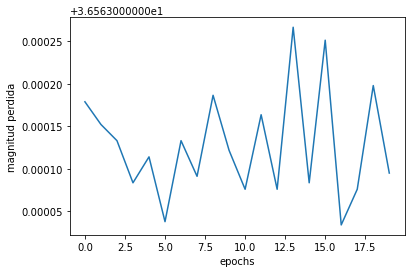

In [275]:
import matplotlib.pyplot as plt

plt.xlabel("epochs")
plt.ylabel("magnitud perdida")
plt.plot(history.history["loss"])

In [276]:
pred = modelo.predict(x_test)

6110/6110 [==============================] - 3s 544us/step


In [277]:
modelo.evaluate(x_test, y_test)

6110/6110 [==============================] - 4s 626us/step - loss: 36.5753 - mae: 5.8821 - mse: 36.5753


[36.57526397705078, 5.882083415985107, 36.57526397705078]

In [278]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
15,36.563251,5.881080,36.563251,15
16,36.563034,5.881106,36.563034,16
17,36.563076,5.881090,36.563076,17
18,36.563198,5.881083,36.563198,18
19,36.563095,5.881072,36.563095,19
